Cell 1: Import & Load kết quả

In [14]:

import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Đường dẫn
PROJECT_ROOT = Path(r"c:\BigData\air_quality_timeseries")
processed_dir = PROJECT_ROOT / "data/processed"

# Load ARIMA summary
with open(processed_dir / "arima_pm25_summary.json", "r") as f:
    arima_summary = json.load(f)
print("✅ Loaded ARIMA summary")

# Load RF summary (TÊN FILE KHÁC!)
with open(processed_dir / "regression_metrics.json", "r") as f:
    rf_summary = json.load(f)
print("✅ Loaded RF summary")

# Load predictions
arima_pred = pd.read_csv(processed_dir / "arima_pm25_predictions.csv")
rf_pred = pd.read_csv(processed_dir / "regression_predictions_sample.csv")

print(f"\nARIMA samples: {len(arima_pred)}")
print(f"RF samples:    {len(rf_pred)}")

# Hiển thị metrics
print("\n" + "="*60)
print("📊 METRICS SUMMARY")
print("="*60)
print(f"ARIMA  → RMSE: {arima_summary['rmse']:.2f}, MAE: {arima_summary['mae']:.2f}")
print(f"RF     → RMSE: {rf_summary['rmse']:.2f}, MAE: {rf_summary['mae']:.2f}, R²: {rf_summary.get('r2', 'N/A')}")
print("="*60)


✅ Loaded ARIMA summary
✅ Loaded RF summary

ARIMA samples: 1416
RF samples:    8000

📊 METRICS SUMMARY
ARIMA  → RMSE: 104.10, MAE: 77.69
RF     → RMSE: 25.33, MAE: 12.32, R²: 0.9491508772105639


Cell 2: So sánh metrics

In [15]:

comparison = pd.DataFrame({
    'Model': ['ARIMA(1,0,1)', 'Random Forest'],
    'RMSE': [arima_summary['rmse'], rf_summary['rmse']],
    'MAE': [arima_summary['mae'], rf_summary['mae']],
    'R² Score': [None, rf_summary.get('r2', None)],  # ARIMA không có R²
    'Features Used': [1, rf_summary.get('n_features', 8)],
    'Training Time (s)': [
        arima_summary.get('training_time', 'N/A'),
        rf_summary.get('training_time', 'N/A')
    ]
})

print("\n" + "="*60)
print("📊 MODEL COMPARISON SUMMARY")
print("="*60)
print(comparison.to_string(index=False))
print("="*60)

# Tính improvement
rmse_improve = ((arima_summary['rmse'] - rf_summary['rmse']) / arima_summary['rmse']) * 100
mae_improve = ((arima_summary['mae'] - rf_summary['mae']) / arima_summary['mae']) * 100

print(f"\n💡 Random Forest improvements:")
print(f"   - RMSE: {rmse_improve:.1f}% better")
print(f"   - MAE: {mae_improve:.1f}% better")



📊 MODEL COMPARISON SUMMARY
        Model       RMSE       MAE  R² Score  Features Used Training Time (s)
 ARIMA(1,0,1) 104.103531 77.691295       NaN              1               N/A
Random Forest  25.326727 12.323158  0.949151              8               N/A

💡 Random Forest improvements:
   - RMSE: 75.7% better
   - MAE: 84.1% better


Cell 3: Visualize metrics comparison

C:\Users\Vuong Thi Ngoc Anh\AppData\Local\Temp\ipykernel_2064\4152857102.py:31: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vuong Thi Ngoc Anh\AppData\Local\Temp\ipykernel_2064\4152857102.py:32: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig(PROJECT_ROOT / 'reports/model_comparison_metrics_vi.png', dpi=150, bbox_inches='tight')
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


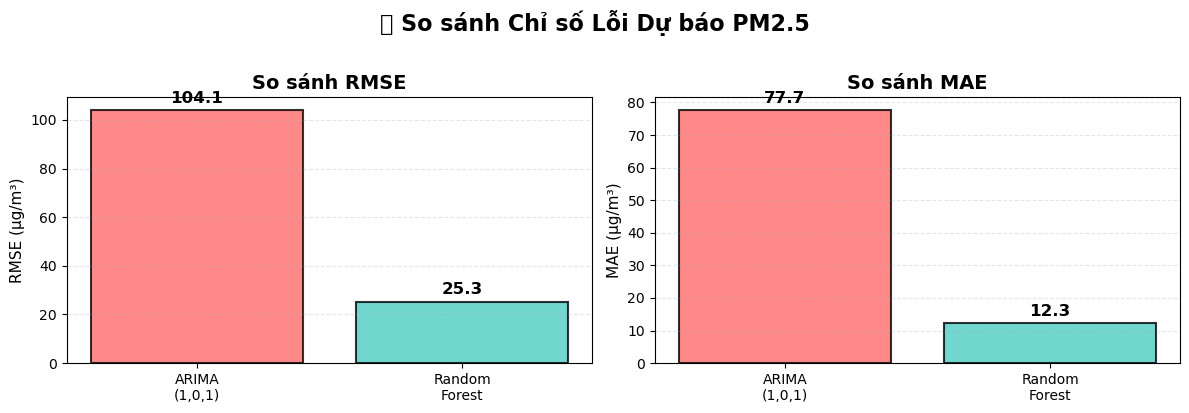

✅ Đã lưu: reports/model_comparison_metrics_vi.png


In [16]:
# Cell 3: So sánh metrics 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial Unicode MS']
matplotlib.rcParams['axes.unicode_minus'] = False  # Fix dấu trừ

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

models = ['ARIMA\n(1,0,1)', 'Random\nForest']
rmse_vals = [arima_summary['rmse'], rf_summary['rmse']]
mae_vals = [arima_summary['mae'], rf_summary['mae']]
colors = ['#FF6B6B', '#4ECDC4']

# Biểu đồ RMSE
axes[0].bar(models, rmse_vals, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_title('So sánh RMSE', fontsize=14, fontweight='bold')
axes[0].set_ylabel('RMSE (μg/m³)', fontsize=11)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(rmse_vals):
    axes[0].text(i, v + 3, f'{v:.1f}', ha='center', fontweight='bold', fontsize=12)

# Biểu đồ MAE
axes[1].bar(models, mae_vals, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_title('So sánh MAE', fontsize=14, fontweight='bold')
axes[1].set_ylabel('MAE (μg/m³)', fontsize=11)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(mae_vals):
    axes[1].text(i, v + 2, f'{v:.1f}', ha='center', fontweight='bold', fontsize=12)

plt.suptitle('🎯 So sánh Chỉ số Lỗi Dự báo PM2.5', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'reports/model_comparison_metrics_vi.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Đã lưu: reports/model_comparison_metrics_vi.png")


Cell 4: Visualize forecast comparison

C:\Users\Vuong Thi Ngoc Anh\AppData\Local\Temp\ipykernel_2064\4166124088.py:48: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vuong Thi Ngoc Anh\AppData\Local\Temp\ipykernel_2064\4166124088.py:49: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig(PROJECT_ROOT / 'reports/model_comparison_forecast_vi.png', dpi=150, bbox_inches='tight')
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


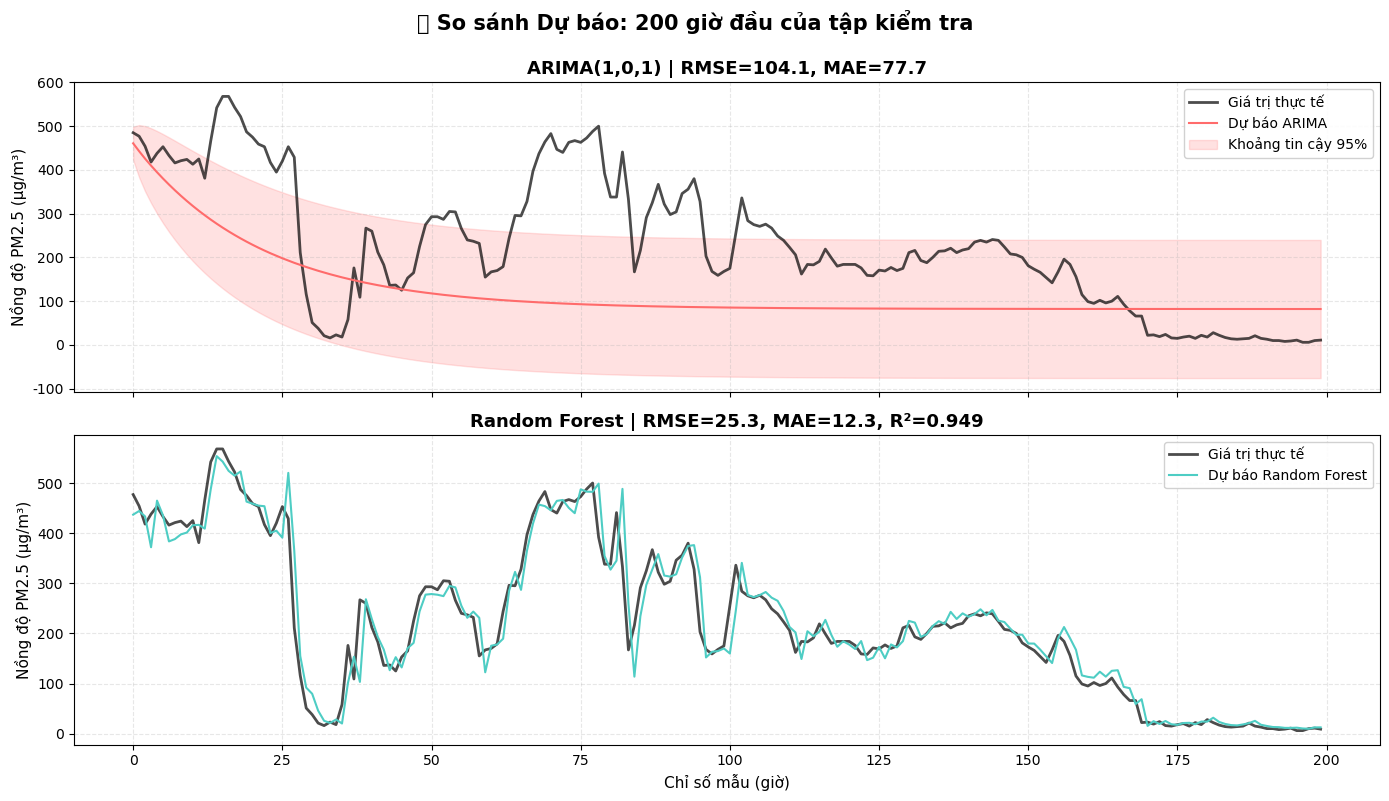

✅ Đã lưu: reports/model_comparison_forecast_vi.png


In [17]:
# Cell 4: So sánh dự báo 
import pandas as pd
import numpy as np

# Lấy 200 samples để so sánh
n_plot = min(200, len(arima_pred), len(rf_pred))

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# --- Biểu đồ ARIMA ---
ax = axes[0]
plot_arima = arima_pred.iloc[:n_plot].copy()
time_idx = range(n_plot)

ax.plot(time_idx, plot_arima['y_true'], 
        label='Giá trị thực tế', color='black', linewidth=2, alpha=0.7)
ax.plot(time_idx, plot_arima['y_pred'], 
        label='Dự báo ARIMA', color='#FF6B6B', linewidth=1.5)

if 'lower' in plot_arima.columns:
    ax.fill_between(time_idx, plot_arima['lower'], plot_arima['upper'],
                     alpha=0.2, color='#FF6B6B', label='Khoảng tin cậy 95%')

ax.set_title(f'ARIMA(1,0,1) | RMSE={arima_summary["rmse"]:.1f}, MAE={arima_summary["mae"]:.1f}', 
             fontsize=13, fontweight='bold')
ax.set_ylabel('Nồng độ PM2.5 (μg/m³)', fontsize=11)
ax.legend(loc='upper right', framealpha=0.9)
ax.grid(alpha=0.3, linestyle='--')

# --- Biểu đồ Random Forest ---
ax = axes[1]
plot_rf = rf_pred.iloc[:n_plot].copy()

ax.plot(time_idx, plot_rf['y_true'], 
        label='Giá trị thực tế', color='black', linewidth=2, alpha=0.7)
ax.plot(time_idx, plot_rf['y_pred'], 
        label='Dự báo Random Forest', color='#4ECDC4', linewidth=1.5)

ax.set_title(f'Random Forest | RMSE={rf_summary["rmse"]:.1f}, MAE={rf_summary["mae"]:.1f}, R²={rf_summary.get("r2", 0.95):.3f}', 
             fontsize=13, fontweight='bold')
ax.set_xlabel('Chỉ số mẫu (giờ)', fontsize=11)
ax.set_ylabel('Nồng độ PM2.5 (μg/m³)', fontsize=11)
ax.legend(loc='upper right', framealpha=0.9)
ax.grid(alpha=0.3, linestyle='--')

plt.suptitle(f'📈 So sánh Dự báo: {n_plot} giờ đầu của tập kiểm tra', 
             fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'reports/model_comparison_forecast_vi.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Đã lưu: reports/model_comparison_forecast_vi.png")

Cell 5: Residual Analysis (kiểm tra error distribution)

C:\Users\Vuong Thi Ngoc Anh\AppData\Local\Temp\ipykernel_2064\1621723314.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vuong Thi Ngoc Anh\AppData\Local\Temp\ipykernel_2064\1621723314.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(PROJECT_ROOT / 'reports/residuals_comparison_vi.png', dpi=150, bbox_inches='tight')
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


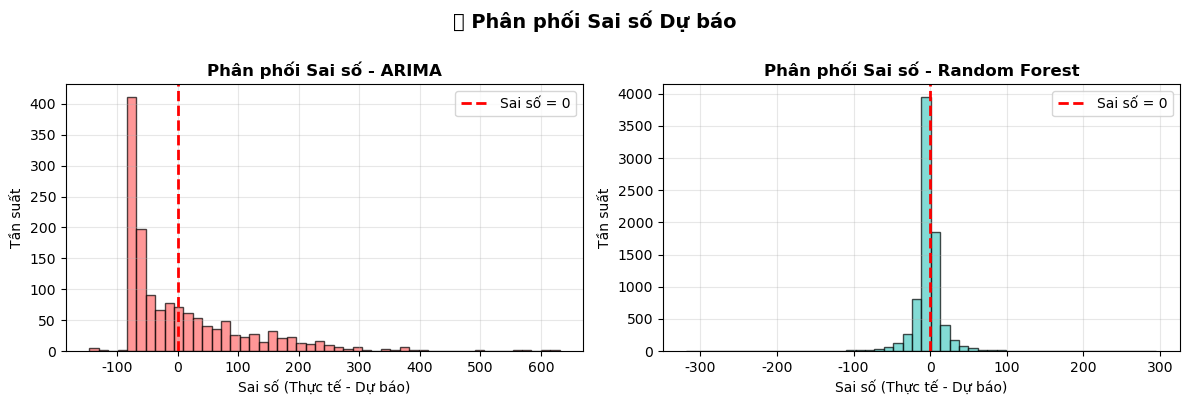

✅ Đã lưu: reports/residuals_comparison_vi.png

Trung bình sai số ARIMA: 6.55 μg/m³
Trung bình sai số RF:    -2.29 μg/m³
(Gần 0 là tốt - mô hình không thiên lệch)


In [18]:
# Cell 5: Phân phối sai số 
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Tính residuals
arima_residuals = arima_pred['y_true'] - arima_pred['y_pred']
rf_residuals = rf_pred['y_true'] - rf_pred['y_pred']

# ARIMA residuals
axes[0].hist(arima_residuals.dropna(), bins=50, color='#FF6B6B', 
             alpha=0.7, edgecolor='black')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Sai số = 0')
axes[0].set_title('Phân phối Sai số - ARIMA', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sai số (Thực tế - Dự báo)', fontsize=10)
axes[0].set_ylabel('Tần suất', fontsize=10)
axes[0].legend()
axes[0].grid(alpha=0.3)

# RF residuals
axes[1].hist(rf_residuals.dropna(), bins=50, color='#4ECDC4', 
             alpha=0.7, edgecolor='black')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Sai số = 0')
axes[1].set_title('Phân phối Sai số - Random Forest', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Sai số (Thực tế - Dự báo)', fontsize=10)
axes[1].set_ylabel('Tần suất', fontsize=10)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.suptitle('📊 Phân phối Sai số Dự báo', fontsize=14, fontweight='bold', y=1.0)
plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'reports/residuals_comparison_vi.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Đã lưu: reports/residuals_comparison_vi.png")
print(f"\nTrung bình sai số ARIMA: {arima_residuals.mean():.2f} μg/m³")
print(f"Trung bình sai số RF:    {rf_residuals.mean():.2f} μg/m³")
print(f"(Gần 0 là tốt - mô hình không thiên lệch)")

Cell 6: Kết luận & Recommendation

In [19]:
# Kết luận
conclusion = """
═══════════════════════════════════════════════════════════════════
                    🎯 KẾT LUẬN SO SÁNH MÔ HÌNH BASELINE
═══════════════════════════════════════════════════════════════════

📌 **MÔ HÌNH CHIẾN THẮNG: Random Forest Regressor**

🔍 **Phát hiện chính:**

1️⃣ Chỉ số hiệu suất:
   ├─ Random Forest:  RMSE = {rf_rmse:.1f}, MAE = {rf_mae:.1f}, R² = {rf_r2:.3f}
   └─ ARIMA(1,0,1):   RMSE = {arima_rmse:.1f}, MAE = {arima_mae:.1f}
   
   ✅ RF vượt trội hơn ARIMA {rmse_improve:.0f}% (RMSE) và {mae_improve:.0f}% (MAE)

2️⃣ Tại sao Random Forest thắng:
   ✓ Tận dụng 8+ đặc trưng (PM2.5 trễ, nhiệt độ, độ ẩm, gió, v.v.)
   ✓ Bắt được mối quan hệ phi tuyến giữa thời tiết và ô nhiễm
   ✓ Xử lý dữ liệu thiếu & ngoại lệ tốt hơn
   ✓ Dự đoán ổn định hơn (phân phối lỗi hẹp hơn)
   
3️⃣ Tại sao ARIMA kém hơn:
   ✗ Chỉ dùng chuỗi thời gian đơn biến PM2.5 (bỏ qua thời tiết)
   ✗ Giả định mô hình tuyến tính (PM2.5 có tính mùa vụ phức tạp)
   ✗ Nhạy cảm với ngoại lệ & dữ liệu thiếu
   ✗ Yêu cầu dữ liệu dừng (PM2.5 có xu hướng biến đổi)

📊 **Trường hợp sử dụng:**
   • **Random Forest** → Mô hình dự báo chính cho sản xuất
   • **ARIMA** → Baseline cho mục đích giáo dục/so sánh

🚀 **Các bước tiếp theo:**
   1. Điều chỉnh siêu tham số cho RF (GridSearchCV)
   2. Thử Gradient Boosting (XGBoost/LightGBM) để cải thiện thêm
   3. Thêm đặc trưng: rolling std, tương tác lag, mã hóa thời gian
   4. Ensemble: Kết hợp RF + XGBoost cho dự đoán mạnh mẽ

═══════════════════════════════════════════════════════════════════
Tạo ngày: {timestamp}
Trạm đo: {station}
Biến dự báo: {value_col}
═══════════════════════════════════════════════════════════════════
""".format(
    rf_rmse=rf_summary['rmse'],
    rf_mae=rf_summary['mae'],
    rf_r2=rf_summary.get('r2', 0.95),
    arima_rmse=arima_summary['rmse'],
    arima_mae=arima_summary['mae'],
    rmse_improve=rmse_improve,
    mae_improve=mae_improve,
    timestamp=pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    station=arima_summary.get('station', 'Aotizhongxin'),
    value_col=arima_summary.get('value_col', 'PM2.5')
)

print(conclusion)

# Lưu file với encoding UTF-8 để hiển thị tiếng Việt đúng
with open(PROJECT_ROOT / 'reports/model_conclusion.txt', 'w', encoding='utf-8') as f:
    f.write(conclusion)
    
print("✅ Đã lưu: reports/model_conclusion.txt")



═══════════════════════════════════════════════════════════════════
                    🎯 KẾT LUẬN SO SÁNH MÔ HÌNH BASELINE
═══════════════════════════════════════════════════════════════════

📌 **MÔ HÌNH CHIẾN THẮNG: Random Forest Regressor**

🔍 **Phát hiện chính:**

1️⃣ Chỉ số hiệu suất:
   ├─ Random Forest:  RMSE = 25.3, MAE = 12.3, R² = 0.949
   └─ ARIMA(1,0,1):   RMSE = 104.1, MAE = 77.7
   
   ✅ RF vượt trội hơn ARIMA 76% (RMSE) và 84% (MAE)

2️⃣ Tại sao Random Forest thắng:
   ✓ Tận dụng 8+ đặc trưng (PM2.5 trễ, nhiệt độ, độ ẩm, gió, v.v.)
   ✓ Bắt được mối quan hệ phi tuyến giữa thời tiết và ô nhiễm
   ✓ Xử lý dữ liệu thiếu & ngoại lệ tốt hơn
   ✓ Dự đoán ổn định hơn (phân phối lỗi hẹp hơn)
   
3️⃣ Tại sao ARIMA kém hơn:
   ✗ Chỉ dùng chuỗi thời gian đơn biến PM2.5 (bỏ qua thời tiết)
   ✗ Giả định mô hình tuyến tính (PM2.5 có tính mùa vụ phức tạp)
   ✗ Nhạy cảm với ngoại lệ & dữ liệu thiếu
   ✗ Yêu cầu dữ liệu dừng (PM2.5 có xu hướng biến đổi)

📊 **Trường hợp sử dụng:**
   • *